# Testing the Cython simulator

In [1]:
%matplotlib inline
import likelihoodfree.viz as viz
import matplotlib.pyplot as plt
import numpy as np
import seaborn.apionly as sns

from lfmods.hh import HHSimulator

In [2]:
sim = HHSimulator(pilot_samples=0, seed=1, cached_sims=False, cached_pilot=False)

In [3]:
init = sim.init.copy()
params = sim.true_params.copy().reshape(1, -1)

dt = sim.dt
t = sim.t.copy()
I = sim.I.copy()

In [4]:
from lfmods.hh_bm import HH as HH_default
from lfmods.hh_bm_cython import HH as HH_cython

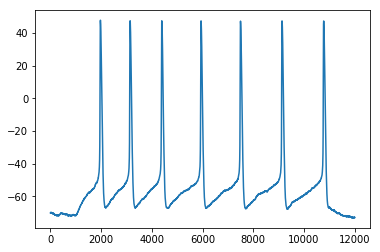

In [5]:
trace_default = HH_default(init, params).sim_time(dt, t, I)
plt.plot(trace_default)

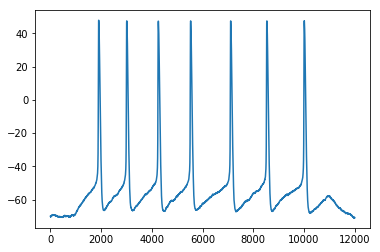

In [6]:
trace_cython = HH_cython(init, params).sim_time(dt, t, I)
plt.plot(trace_cython)

In [7]:
%timeit theta = sim.sim_prior(n_samples=1)[0].reshape(1,-1); trace_default = HH_default(init, params).sim_time(dt, t, I)

1 loop, best of 3: 244 ms per loop


In [8]:
%timeit theta = sim.sim_prior(n_samples=1)[0].reshape(1,-1); trace_default = HH_cython(init, params).sim_time(dt, t, I)

10 loops, best of 3: 26.1 ms per loop
